In [1]:
from initial_classif.trainset.variable_training_sets import *
from initial_classif.trainset.gaia_extraction import *
import sys
from astropy.coordinates import SkyCoord
import astropy.units as u
sys.path.append('../../../')
from virac_utils import wrap, betw

from config import *
config=configuration()
config.request_password()

from interface_utils import light_curve_loader
ll = light_curve_loader.lightcurve_loader()

 ·············


In [6]:
### Good for stage 2
lcentre, bcentre, test_sizel, test_sizeb = 0.787411, -0.054603, 0.09*60., 0.09*60

In [78]:
with open(config['variable_dir']+'var_trainset_virac2.pkl', 'rb') as f:
    dsets = pickle.load(f)

## Binary classification

In [2]:
v = load_all_variable_stars(config, test=True)
# c = SkyCoord(ra=v['ra']*u.deg, dec=v['dec']*u.deg, frame='icrs').transform_to('galactic')
# v['l'], v['b'] = c.l.deg, c.b.deg
# v = v[betw(v['l'],lcentre-test_sizel*.5/60.,lcentre+test_sizel*.5/60.) & betw(v['b'],bcentre-test_sizeb*.5/60.,lcentre+test_sizeb*.5/60.)].reset_index(drop=True)
v[['virac2_id','var_class']].groupby('var_class').agg('count')

/data/jls/python3.5/site-packages/sqlutilpy/sqlutil.py:398: UserWarning: Column name sourceid is repeated in the output, new name sourceid_1 assigned
  'new name %s assigned') % (_n, curn))


,virac2_id
var_class,
EA/EB,210
EW,47
Ell,13
RRab,21
RRc,9
T2CEP,2


In [3]:
c = SkyCoord(ra=v['ra_x'].values*u.deg, dec=v['dec_x'].values*u.deg, frame='icrs').transform_to('galactic')
v['l'], v['b'] = c.l.deg, c.b.deg

In [13]:
g = generate_gaia_training_set(lcentre, bcentre, test_sizel, test_sizeb, 50., len(v), config)

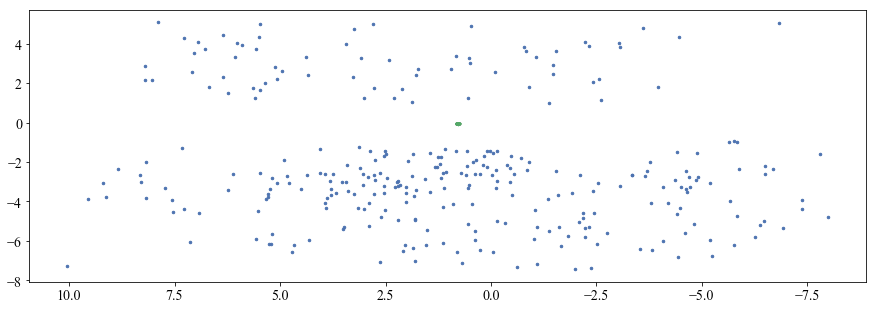

In [14]:
plt.figure(figsize=[15.,5.])
# plt.plot(wrap(v['l']),v['b'],'.',ms=0.1)
plt.plot(wrap(v['l']),v['b'],'.',ms=5)
plt.plot(wrap(g['l']),g['b'],'.',ms=1)
# plt.xlim(260.,270.)
# plt.ylim(-30,-25)
# plt.xlim(0.,2.)
# plt.ylim(-0.5,0.5)
plt.gca().invert_xaxis()

In [18]:
v['class']='VAR'
g['class']='CONST'
full_data = pd.concat([v, g], axis=0, sort=False)

In [24]:
from initial_classif.classifier.classifier import binary_classification
classfier = binary_classification(full_data)

10.620000000000001% sources removed from clip.
       ks_stetson_j
class              
CONST           272
VAR             274


In [25]:
classfier.cm

array([[230,  42],
       [ 28, 246]])

In [26]:
classfier.cr

'              precision    recall  f1-score   support\n\n       CONST       0.89      0.85      0.87       272\n         VAR       0.85      0.90      0.88       274\n\n    accuracy                           0.87       546\n   macro avg       0.87      0.87      0.87       546\nweighted avg       0.87      0.87      0.87       546\n'

In [27]:
grid_from_pickle = pickle.load(open('/local/scratch_2/jls/virac_classifier/binary/grid_test.pkl', 'rb'))
classifier_from_pickle = pickle.load(open('/local/scratch_2/jls/virac_classifier/binary/binary_0_test.pkl', 'rb'))

In [28]:
grid_from_pickle

,b,index,l
0,-0.054603,0,0.787411


In [29]:
classifier_from_pickle.feature_importance

{'ks_eta': 0.03753884349702772,
 'ks_kurtosis': 0.19421342153284102,
 'ks_mad': 0.11220030770023791,
 'ks_p100_p0': 0.024513199773047018,
 'ks_p75_p25': 0.14128473736717798,
 'ks_p84_p16': 0.10035947051787676,
 'ks_p95_p5': 0.04748091757230272,
 'ks_p99_p1': 0.025907207415144327,
 'ks_skew': 0.04332575015302972,
 'ks_stdev': 0.03737217964043344,
 'ks_stetson_i': 0.165348326058998,
 'ks_stetson_j': 0.04697692369544985,
 'ks_stetson_k': 0.023478715076433555}

In [30]:
classifier_from_pickle.cm

array([[236,  44],
       [ 34, 244]])

## Variable classification

In [34]:
len(g['sourceid'])

302

In [50]:
from interface_utils.light_curve_loader import split_lcs

In [61]:
ll = light_curve_loader.lightcurve_loader()

In [62]:
%%timeit -n 1 -r 1 
ll.split_lcs(g);

3.36 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [74]:
from initial_classif.trainset.gaia_extraction import generate_gaia_training_set_random
constant_data = generate_gaia_training_set_random(2000, config, 50., 20000)

In [76]:
len(constant_data)

1179

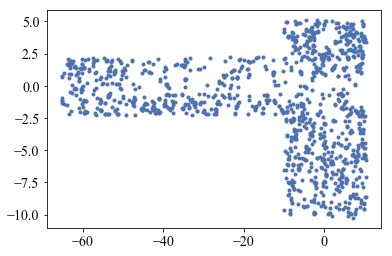

In [77]:
plt.plot(wrap(constant_data['l']),constant_data['b'],'.')